<a href="https://colab.research.google.com/github/Dethkalleon/MLKublik/blob/main/%D0%9A%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%95%D0%98_%D0%9C%D0%9B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР 6.1 - Кластеризация

### Цель работы

Освоить на практике основные приемы работы с самыми распространенными алгоритмами кластеризации.


### Содержание работы

1. Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.
2. Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.
3. Визуализируйте результат кластеризации. Выведите центры кластеров.
4. Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.
5. Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?
6. Нормализуйте датасет и повторите кластеризацию.
7. Постройте для наглядности кластеризацию только по двум признакам.
8. Постройте на том же датасете иерархическую кластеризацию.
9. Постройте на этих же данных кластеризацию методом DBSCAN.



### Выполнение

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram

In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

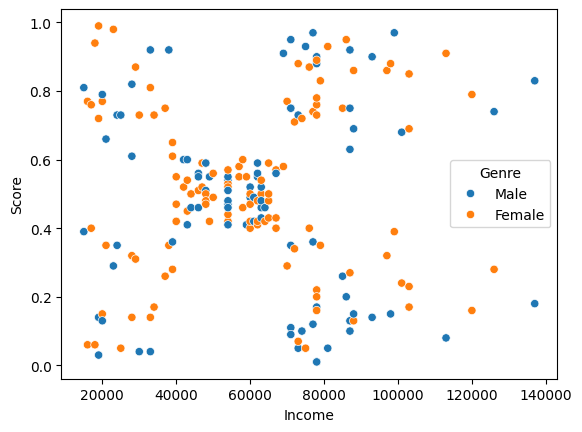

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [ ]:
X.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,19,15000,0.39,False,True
1,21,15000,0.81,False,True
2,20,16000,0.06,True,False
3,23,16000,0.77,True,False
4,31,17000,0.40,True,False


Кластеризация К-средних

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42).fit(X)

Нужно заметить, что алгоритм К-средних принимает один обязательный аргумент в своем конструкторе - желаемое количество кластеров. Алгоритм К-средних всегда разбивает выборку на заранее заданное количество. Для начала попробуем три кластера.

Прежде чем оценивать качество работы обученного алгоритма, надо получить информацию о том, какую точку к какому кластеру модель отнесла. Эти данные содержатся в свойстве labels_:

In [ ]:
y_kmeans = k_means.labels_
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

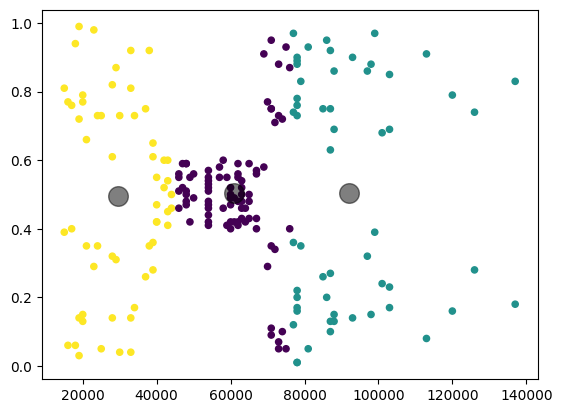

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Но теперь перед нами встает вопрос, а правильное ли число кластеров мы выбрали? Для того,чтобы принимать решение, какое количество кластеров лучше или хуже, нам нужно воспользоваться метрикой качества. Мы возьмем самую распространенную - WCSS, или инерцию. Она уже рассчитана автоматически и помещена в свойство inertia_

Воспользуемся методом локтя для выбора оптимального количества кластеров. Для этого обучим модель с разным количеством, скажем, от 1 до 10, и для каждого количества выведем значение WCSS на графике:

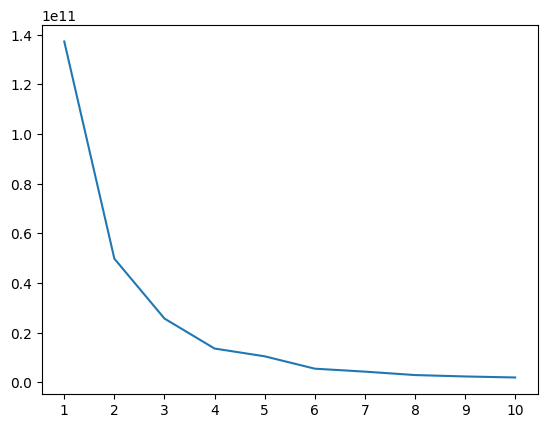

In [ ]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i,random_state=42)
  k_means.fit(X)
  wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

Наша задача найти "излом" на этой кривой, то есть такое значение, после которого метрика продолжает падает уже значительно медленнее. В данном случае, можно видеть, что 4 кажется неплохим выбором. Давайте построим кластеризацию на 4 кластера:

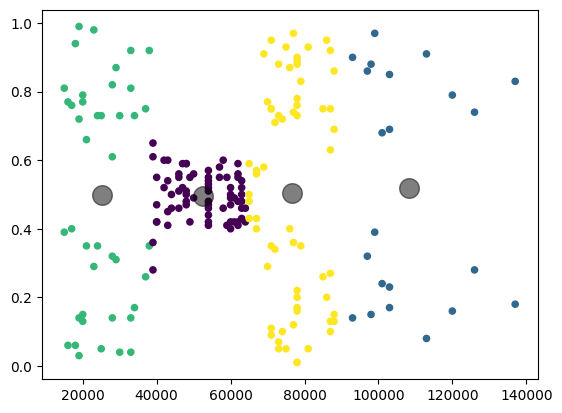

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)
y_kmeans = k_means.labels_

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

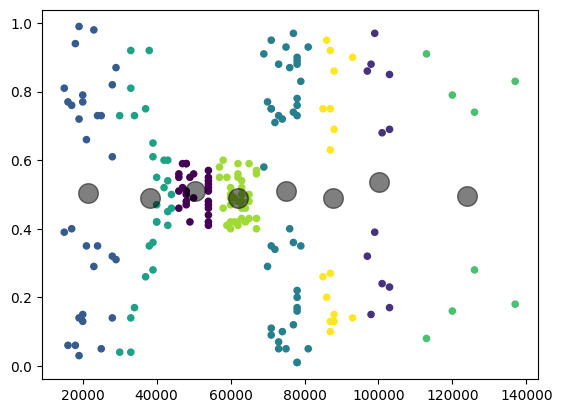

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)
y_kmeans = k_means.labels_

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Центры кластеров подозрительно всегда располагаются вдоль одной оси. И это не кажется оптимальным, когда мы смотрим на общее расположение точек. Если вы видите такое поведение, когда странное поведение выражается вдоль определенной оси, это должно вас навести на мысль о том, что что-то не так с масштабом.

И действительно, если мы взглянем на подписи осей, станет очевидным, что горизонтальная ось выражена в десятках тысяч, а вертикальная - в долях единицы. У нас типично ненормализованные данные. Давайте исправим эту ошибку и посмотрим, как это отразится на результатах кластеризации.

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


<Axes: xlabel='Income', ylabel='Score'>

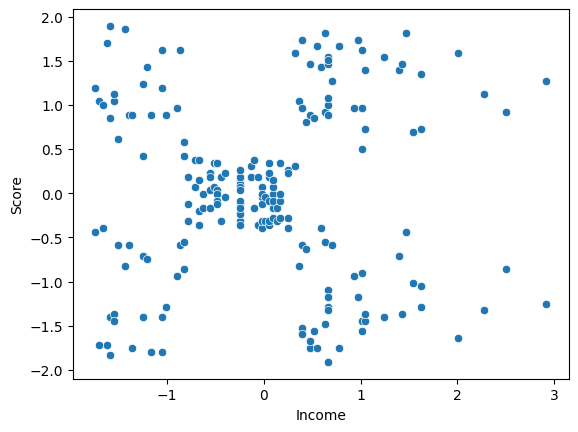

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=X_scaled)

Теперь давайте повторим наш анализ методом локтя. Для наглядности выведем сразу два графика: по нормализованным данным и по исходной матрице:

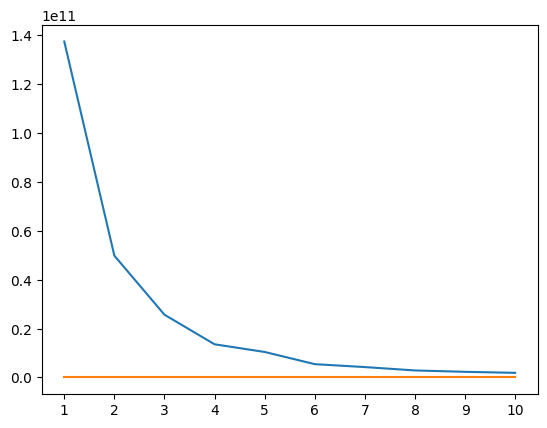

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

Дело опять же в масштабе.

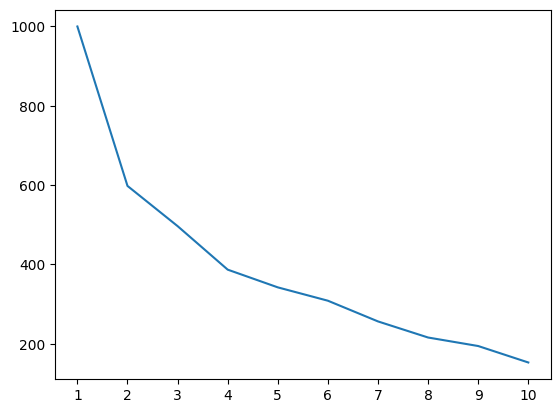

In [ ]:
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

Теперь WCSS измеряется всего в сотнях. Это кстати, значит, что судя только по этой метрике, кластеры получились гораздо компактнее в нормированной матрице. Оно и понятно. По этому графику аналогично можно вывести, что 4 - оптимальное количество кластеров. Повторим обучение модели:



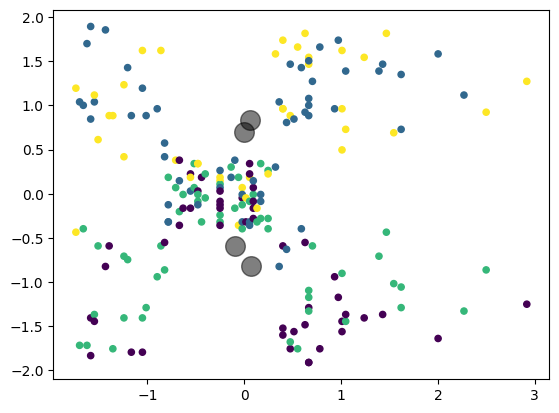

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

y_kmeans = k_means.labels_

plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Главное, что центры кластеров уже не выстраиваются в линию параллельно одному из измерений. Однако, кластеры кажутся перемешанными. Это происходит от того, что мы смотрим на датасет в проекции. Поэтому при решении реальных задач не всегда можно опираться на визуализацию, а ориентироваться нужно в первую очередь на метрики.

Но для того, чтобы продемонстрировать то, насколько адекватно работает работает алгоритм K-средних, обучим его на плоском датасете, состоящим всего их двух признаков. Для этого удалим из матрицы лишние столбцы, оставив только те, которые выше мы использовали для визуализации:



In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Повторим визуализацию для анализа методом локтя:



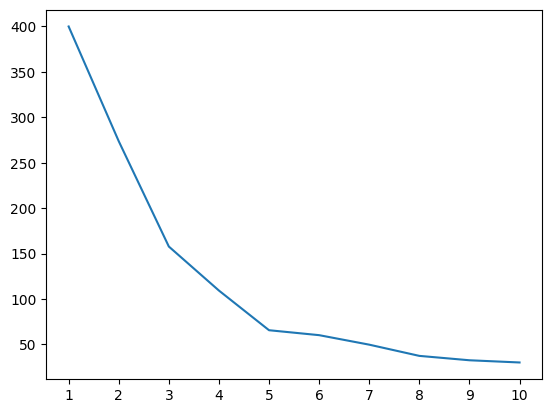

In [ ]:
lokot = []
for i in range(1,11):
	lokot.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11), lokot)
plt.xticks(range(1,11))
_ = plt.show()

Мы видим, что довольно отчетливо оптимальное количество кластеров уже 5, а не 4 как ранее. Каждый раз, когда форма распределения точек в пространстве признаков меняется, это может отразиться на их группировке, а значит, метод локтя нужно повторять. Построим кластеризацию по 5 точкам:



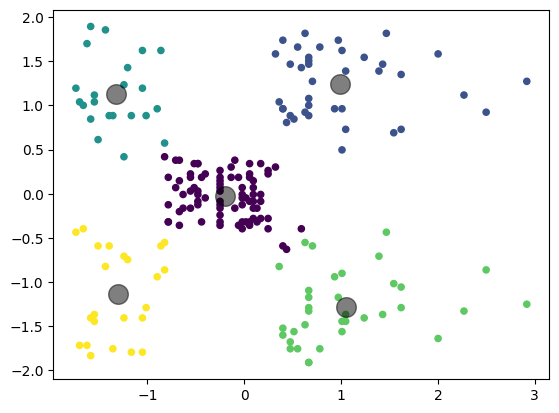

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)

y_kmeans = k_means.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Алгоритм К-средних работает вполне удовлетворительно на тех данных, которые мы анализировали в предыдущей части. Но есть и другие алгоритмы кластеризации, которые имеют свои особенности. Одним тех, которые часто требуются является алгоритм агломеративной кластеризации. Его особенность в том, что это иерархический метод. Он позволяет не только разбить выборку на определенное число кластеров, но и построить таксономию - то есть последовательное объединение кластеров также по принципу сходства.

Работа с моделью агломеративной кластеризации по интерфейсу полностью аналогична:



In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

При создании модели ей передается два аргумента, причем они работают альтернативно. Вы можете задать определенное количество кластеров, тогда порог игнорируется (задается как None), но так мы уже делали. Поэтому воспользуемся вторым "режимом" работы - зададим порог функции расстояния, тогда количество кластеров алгоритм будет выбирать сам и нам нужно задать в этом параметре None.

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

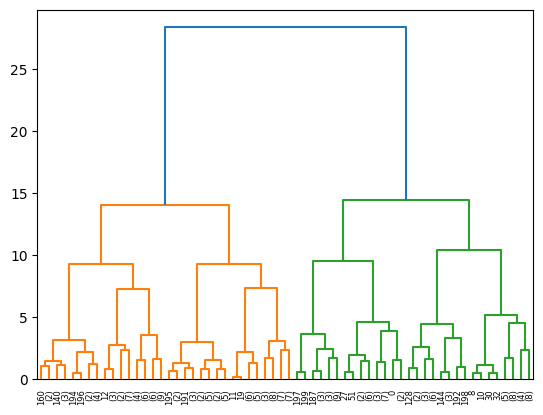

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

Разберемся, как устроен это график. По вертикали на нем отложена мера расстояния между объектами или кластерами. По горизонтали - объекты датасета. Соответственно, на уровне самих объектов расстояние между ними равно нулю (расстояние от объекта до самого себя). Ближайшие объекты объединяются в группу, что отражается на дендрограмме характерной формой с перемычкой на том вертикальном уровне, который соответствует расстоянию между объектами. Затем эти группы объединяются между собой, и так до тех пор, пока вся выборка не будет объединена.

Соответственно, интерес представляет именно порядок, в котором разные объекты будут объединяться. Чем две точки выборки дальше друг от друга, тем позже они попадут в один кластер, и тем выше на дендрограмме будет это объединение.

Соответственно, мы можем как бы "обрезать" это дендрограмму на определенном уровне. Тогда точки, которые попали в одну группу будут "зачислены" в общий кластер. Чем ниже мы обрезаем дендрограмму, тем мельче будут кластеры, но больше их количество. Именно за этот уровень и отвечает аргумент distance_threshold конструктора класса агломеративной кластеризации.

Либо, мы можем исходить, как раньше, из желаемого количества кластеров. Тогда алгоритм "обрежет" дендрограмму на таком уровне, чтобы получилось необходимое количество групп. Построим кластеризацию на нашем нормализованном датасете:



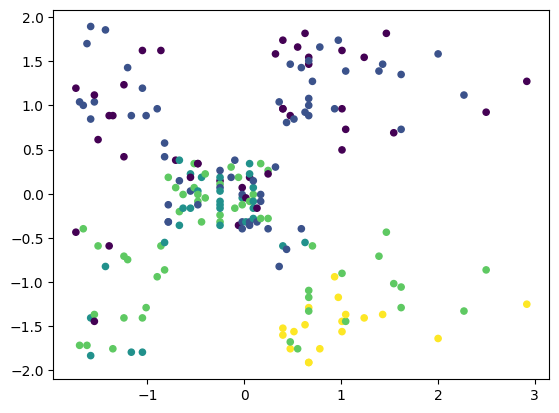

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

Для наглядности, обучим этот алгоритм на плоских данных, чтобы показать визуально, как он объединяет точки на плоскости.



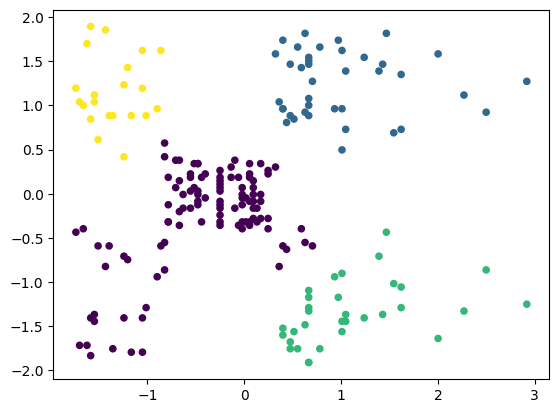

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

DBSCAN

Еще один алгоритм кластеризации, который необходимо разобрать на практике, потому, что он использует совершенно другой подход - DBSCAN. Он оценивает плотность расположения точек в окрестностях заданной. Попробуем построить его на тех же данных (для наглядности, будем использовать плоские данные):



In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

У конструктора данного класса два обязательных аргумента: eps - максимальный радиус вокруг точки, попадание в который считается соседством; и min_samples - количество соседних точек, которых достаточно для признания данной точки внутренней. Оба параметра оказывают существенное влияние на результат кластеризации. Они подбираются эмпирически.

Обычно, эмпирический выбора гиперпараметров модели обучения опирается на значение метрики качества. Так мы делали в предыдущем пункте, в методе локтя. Но сейчас покажем другой подход. Можно мониторить количество кластеров и точек шума, которые определяет алгоритм при данных значениях гиперпараметров. Эти данные можно вычислять так:

In [ ]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

Дело в том, что алгоритм DBSCAN в sklearn использует значение "-1" как метку, показывающую, что данная точка отнесена к шуму. Теперь мы можем построить график зависимости количества кластеров и шума в зависимости от значения гиперпараметра eps:



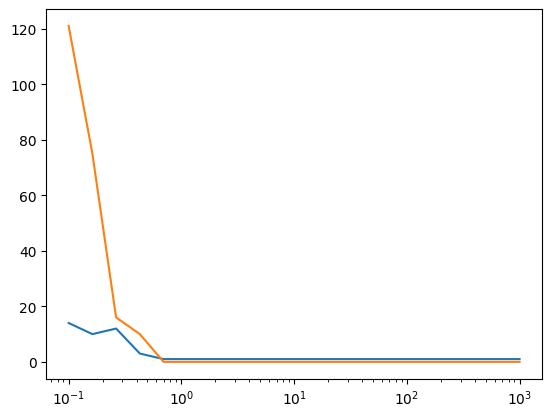

In [ ]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

Он показывает, что чем больше радиус, тем меньше и кластеров и шума получается. Это логично, ведь при большем радиусе алгоритм будет склонен зачислять все точки в один кластер. Мы можем выбрать оптимальное значение eps опять же, методом локтя, или руководствуясь желаемым количеством кластеров.

Количество точек, то есть параметр min_samples тоже можно подобрать перебором. Его обычно берут в диапазон от 2 до 5, в зависимости от желаемого результата. Давайте построим кластеризацию с подобранными значениями параметров:



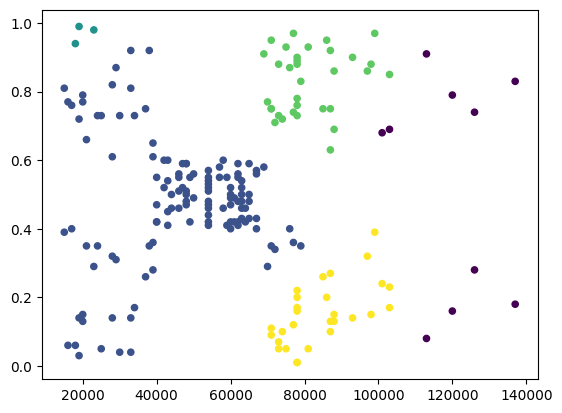

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

### Задания для самостоятельного выполнения

#### Задание 1
Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.


In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
x = df.drop(['CustomerID'], axis=1)
X = pd.get_dummies(x)

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
df['Cluster'] = model.labels_

# Примеры точек из каждого кластера
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nПримеры из кластера {cluster}")
    display(df[df['Cluster'] == cluster].head(3))


Примеры из кластера 0


,CustomerID,Genre,Age,Income,Score,Cluster
8,9,Male,64,19000,0.03,0
10,11,Male,67,19000,0.14,0
14,15,Male,37,20000,0.13,0



Примеры из кластера 1


,CustomerID,Genre,Age,Income,Score,Cluster
3,4,Female,23,16000,0.77,1
5,6,Female,22,17000,0.76,1
7,8,Female,23,18000,0.94,1



Примеры из кластера 2


,CustomerID,Genre,Age,Income,Score,Cluster
2,3,Female,20,16000,0.06,2
4,5,Female,31,17000,0.40,2
6,7,Female,35,18000,0.06,2



Примеры из кластера 3


,CustomerID,Genre,Age,Income,Score,Cluster
0,1,Male,19,15000,0.39,3
1,2,Male,21,15000,0.81,3
15,16,Male,22,20000,0.79,3


#### Задание 2
Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

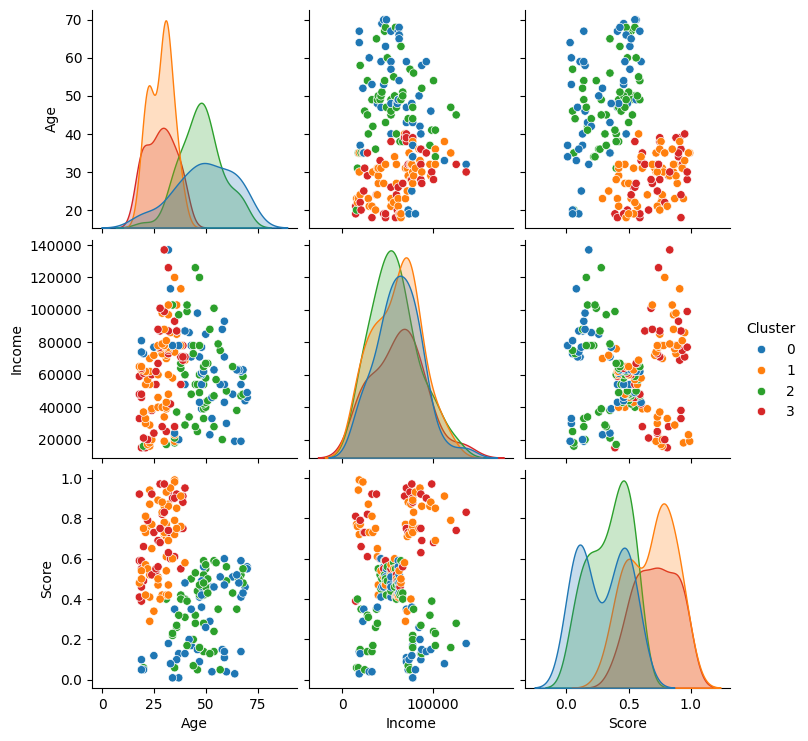

In [ ]:
sns.pairplot(df, vars=['Age', 'Income', 'Score'], hue='Cluster', palette='tab10')
plt.show()

#### Задание 3
В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.

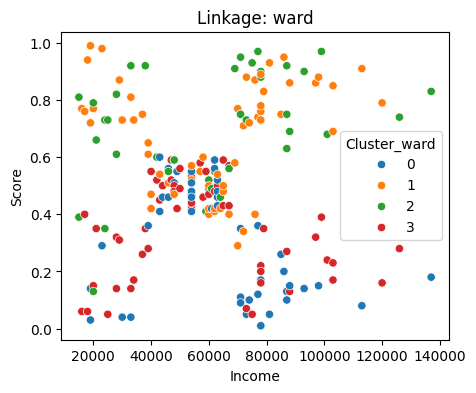

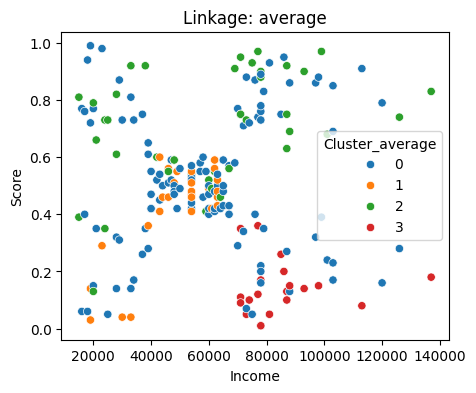

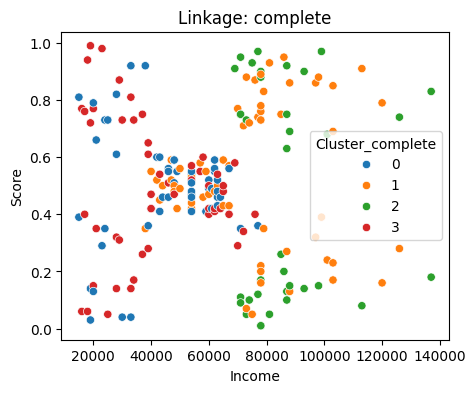

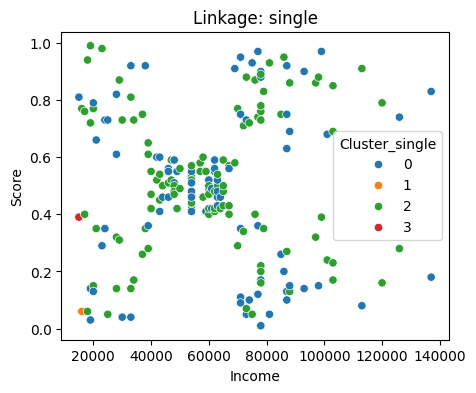

In [ ]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'average', 'complete', 'single']

for linkage in linkages:
    model = AgglomerativeClustering(n_clusters=4, linkage=linkage).fit(X_scaled)
    df[f'Cluster_{linkage}'] = model.labels_

    plt.figure(figsize=(5, 4))
    sns.scatterplot(x='Income', y='Score', data=df, hue=f'Cluster_{linkage}', palette='tab10')
    plt.title(f'Linkage: {linkage}')
    plt.show()


#### Задание 4
В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = db.labels_
core_samples_mask = labels != -1

clusters = set(labels) - {-1}

def compute_dbscan_wcss(X, labels):
    wcss = 0
    for label in set(labels):
        if label == -1:
            continue
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        wcss += ((cluster_points - centroid) ** 2).sum()
    return wcss

dbscan_wcss = compute_dbscan_wcss(X_scaled.values, labels)
print("Approx. WCSS (DBSCAN):", dbscan_wcss)

# Сравнение с KMeans
kmeans = KMeans(n_clusters=len(clusters), random_state=42).fit(X_scaled)
print("WCSS (KMeans):", kmeans.inertia_)


Approx. WCSS (DBSCAN): 23.74647061311198
WCSS (KMeans): 194.2253607789833


#### Задание 5
Постройте кривые WCSS в зависимости от параметров DBSCAN.

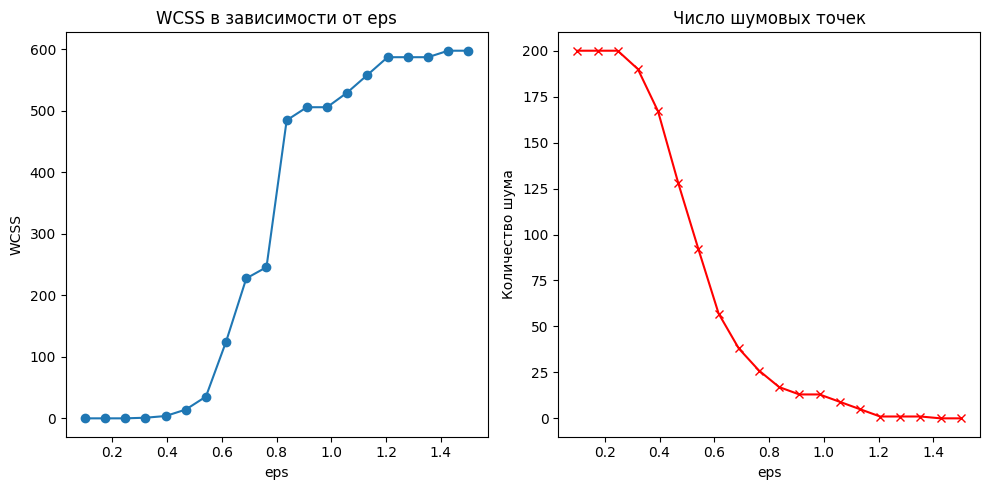

In [ ]:
eps_range = np.linspace(0.1, 1.5, 20)
wcss_vals = []
noise_counts = []

for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    wcss_vals.append(compute_dbscan_wcss(X_scaled.values, labels))
    noise_counts.append(np.sum(labels == -1))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(eps_range, wcss_vals, marker='o')
plt.title("WCSS в зависимости от eps")
plt.xlabel("eps")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(eps_range, noise_counts, marker='x', color='red')
plt.title("Число шумовых точек")
plt.xlabel("eps")
plt.ylabel("Количество шума")

plt.tight_layout()
plt.show()

# ЛР 6.2 - Понижение размерности

### Цель работы

Ознакомиться с основными методами понижения размерности, изучить их применение на практике, сравнить эффективность разных методов и визуализировать результаты.


### Содержание работы

1. Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.
2. Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.
3. Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.
4. Выберите оптимальное количество главных компонент по методу локтя.
5. Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа.
6. Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.
7. Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

### Выполнение

In [ ]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, make_blobs, make_circles
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

PCA на сгенерированных данных

Самый распространенный метод понижения размерности - метод главных компонент, PCA. Для того, чтобы понять смысл и основной механизм этого метода, мы разберем его действия на нескольких примерах. Для начала - на искусственных данных. Метод главных компонент выделяет самые информативные "направления" в пространстве признаков. Проще всего увидеть это направление на таком датасете, который демонстрирует сильную корреляцию.



In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

<ipython-input-3-043a0bf9dd44>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, s=20, cmap='viridis')


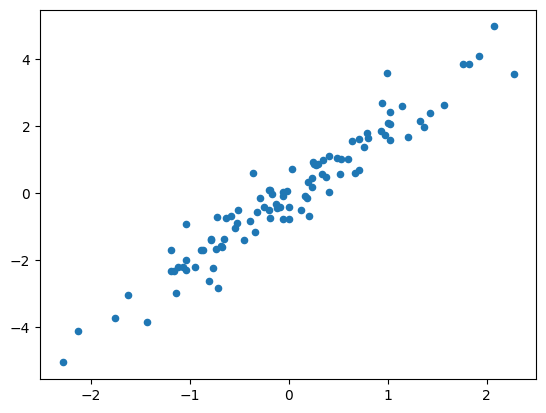

In [ ]:
plt.scatter(x, y, s=20, cmap='viridis')

Попробуем применить метод понижения размерности сразу, на данных как есть.

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

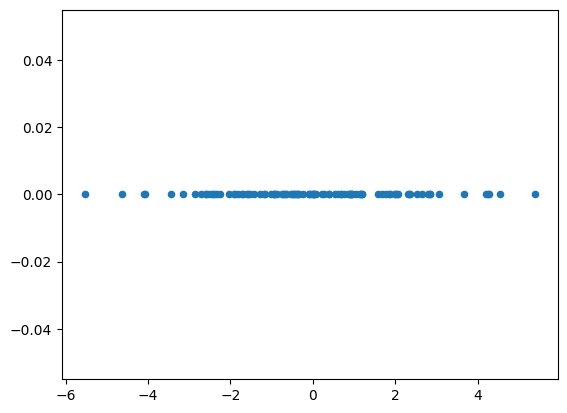

In [ ]:
plt.scatter(X_pca, np.zeros_like(X_pca), marker='o', s=20)

Это распределение, по сути, представляет собой проекцию исходного множества точек на определенную прямую. Эта прямая представляет собой направление, вдоль которого дисперсия исходного распределения максимальна. Этот вектор (направление) как раз и представляет собой главную компоненту.

Информацию о главной компоненте можно получить в соответствующих свойствах обученного объекта:



In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.42464803 0.90535852]]
Объясненная дисперсия: [0.98896537]


В нашем случае двумерных данных можно очень наглядно визуализировать главную компоненту в исходном распределении. Можно изобразить вектор этого направления на диаграмме рассеяния:



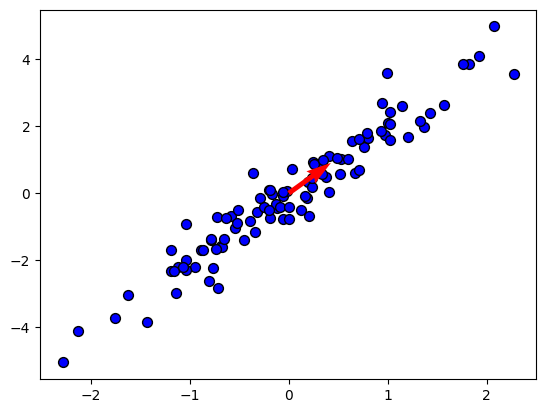

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

На практике, данные перед применение метода понижения размерности необходимо нормировать. Посмотрим, как нормировка данных влияет на результат. Воспользуемся уже известным методом стандартизации:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


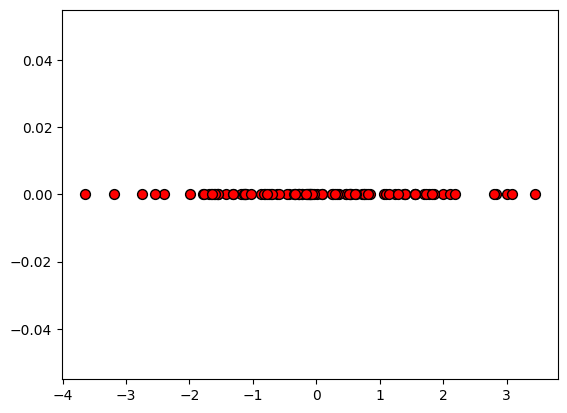

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

PCA на многомерных данных

По аналогии проследим работу того же алгоритма, но уже на данных, состоящих из большего количества измерений. Для примера возьмем встроенный датасет о диагностике рака:



In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

Этот набор данных содержит 30 столбцов. Это хорошее число, имеет смысл уменьшить. Пока запомним, что в исходных данных именно 30 столбцов, это пригодится позднее.

Теперь применим метод главных компонент. Сейчас выберем уже две главные компоненты. В таком случае результат можно будет визуализировать. Обратите внимание, что мы обязательно применяем нормализацию:



In [ ]:
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

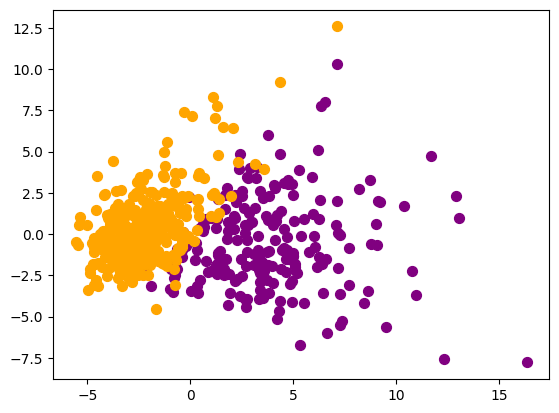

In [ ]:
X_pca_0 = X_pca[y == 0]
X_pca_1 = X_pca[y == 1]

# Создаем scatter plot для каждого класса
plt.scatter(X_pca_0[:, 0], X_pca_0[:, 1], c='purple', label='Класс 0', marker='o', s=50)
plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1], c='orange', label='Класс 1', marker='o', s=50)

Мы здесь видим, по сути, проекцию набора точек из тридцатимерного пространства на плоскость. Причем эта плоскость расположена внутри этого тридцатимерного пространства таким образом, чтобы сохранить максимальную дисперсию. Другими словами, эта плоскость расположена так, чтобы в проекции точки были максимально разбросаны.

Можно задаться вопросом, как эта плоскость расположена внутри этого тридцатимерного пространства. Плоскость задается двумя векторами. Именно эти вектора и есть главные компоненты - направления, вдоль которых дисперсия максимальна.



In [ ]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


В отличие от предыдущего примера, мы все-таки очень сильно сократили размерность. Это значит, что точки все равно сильно сместились относительно своего изначального положения в проекцию. То есть часть данных мы потеряли. Давайте посмотрим, какую именно часть выборочной дисперсии мы сохранили после понижения размерности:

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


В соответствующем свойстве объекта модели лежит массив, который показывает долю сохраненной (объясненной) дисперсии данных по каждой компоненте. Здесь мы видим, что проекция на первую главную компоненту сохраняет 44% дисперсии исходных данных. Это значит, что если бы мы сократили размерность до одной, то потеряли бы 56% исходной информации.

Введение второй компоненты добавляет еще 19% дисперсии. Таким образом, всего у нас получается 63%. Можно считать, что понижение размерности в данном случае приводит к потере 37% информации о разбросе точек, имеющейся в исходном наборе.



Метод локтя для PCA

Метод понижения размерности полезен для визуализации данных, но применяют его не только для этого. Он может быть хорошим помощником в тех случаях, когда в исходных данных слишком много признаков, их число надо сократить, но так, чтобы максимально сохранить имеющуюся информацию. В таком случае встает вопрос выбора количества компонент.

При определении оптимального количества компонент следует ориентироваться на то, насколько быстро растет количество информации в зависимости от количества измерений. Для того, чтобы отследить эту зависимость, построим график. Для этого построим алгоритм главных компонент с количеством компонент от 1 до 30:



Text(0.5, 1.0, 'Зависимость объясненной дисперсии от кол-ва компонент')

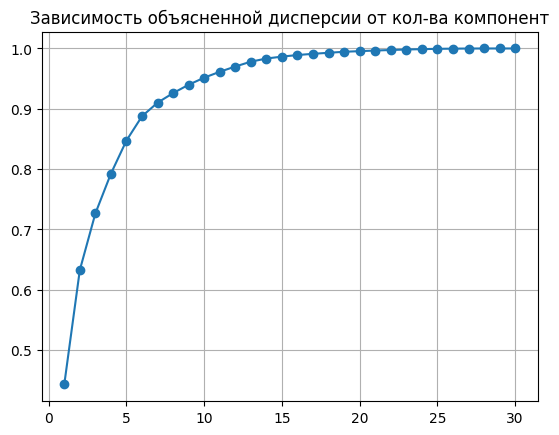

In [ ]:
n_components_range = range(1, 31)
explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, marker='o')
plt.grid(True)
plt.title("Зависимость объясненной дисперсии от кол-ва компонент")

Единственная главная компонента обеспечивает 44% вариации исходных данных (мы уже видели это число ранее). При добавлении второй - мы получаем значительную прибавку. При добавлении третьей - прибавка чуть меньше. С каждой новой компонентой мы получаем чуть меньше дополнительной информации.

Смысл в том, чтобы найти такое количество, которое дает оптимальное количество сохраненной информации. Для этого найдем такое значение, в котором данная кривая максимально изгибается. Это и будет локоть. Можно предположить, что в данном случае оптимальное количество 6 или 7 компонент. Если брать больше, дополнительные измерения уже не обеспечат такого значительного прироста информации.



In [ ]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


Обратите внимание, что в данном методе первые компоненты не зависят от того, сколько компонент мы задала. Другими словами, метод всегда найдет одну и ту же главную компоненту, ее положение не зависит от количества компонент, которые мы оставляем. То есть, задание количества компонент по сути является лишь критерием остановки алгоритма (как ограничение глубины решающего дерева).



Метод LDA

Метод главных компонент неплохо работает в большинстве случаев. Однако, у него есть один недостаток - он принимает во внимание только взаимное расположение точек. Если перед вами датасет для классификации, этот метод может найти такие компоненты, то есть такие направления в исходном пространстве, после проекции на которые, точки разных классов могут оказаться еще ближе друг к другу, чем были в исходном распределении. Это может сильно осложнить задачу классификации, когда после проекции точки классов перемешаются.

Именно для решения этой проблемы существует метод линейного дискриминантного анализа. Он принимает во внимание значение целевой переменной. И выбирает направления проекции таким образом, чтобы максимизировать расстояние между классами. Рассмотрим, например, такой датасет:



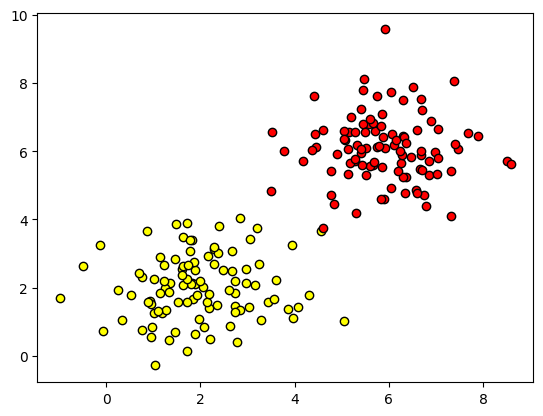

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

plt.scatter(x1, y1, c="yellow", edgecolors='black', linewidth=1)
plt.scatter(x2, y2, c="red", edgecolors='black', linewidth=1)

Легко представить себе, что проецируя это распределение вдоль некоторых направлений, изначально очень разделимые классы могут полностью перемешаться. Посмотрим, как этому препятствует метод LDA. Интерфейс у класса этого метода, конечно, точно такой же, как и у предыдущего:



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

Как и в предыдущем методе, мы можем найти информацию о направлении проекции в исходном пространстве. Для этого в методе LDA есть свойство intercept:

In [ ]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[7.90542737 9.61684348]]


Метод LDA для анизатропных классов

В примере выше вы можете самостоятельно сравнить результаты работы метода LDA и метода главных компонент. В данном случае они дадут очень схожие результаты. Но в ряде случаем можно наглядно показать, чем они отличаются. Рассмотри такой датасет:



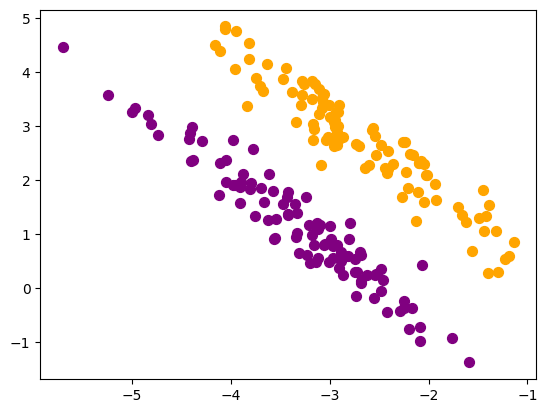

In [ ]:
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

X_0 = X[y == 0]
X_1 = X[y == 1]

# Создаем scatter plot для каждого класса
plt.scatter(X_0[:, 0], X_0[:, 1], c='purple', label='Класс 0', marker='o', s=50)
plt.scatter(X_1[:, 0], X_1[:, 1], c='orange', label='Класс 1', marker='o', s=50)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[24.59931105 28.80353457]]


Метод t-SNE

Рассмотрим еще один интересный метод понижения размерности - t-SNE. Он часто используется для визуализации кластеров - то есть близких групп точек в наборе данных. Давайте рассмотрим механизм его действия на примере уже использованного нами датасета для классификации:



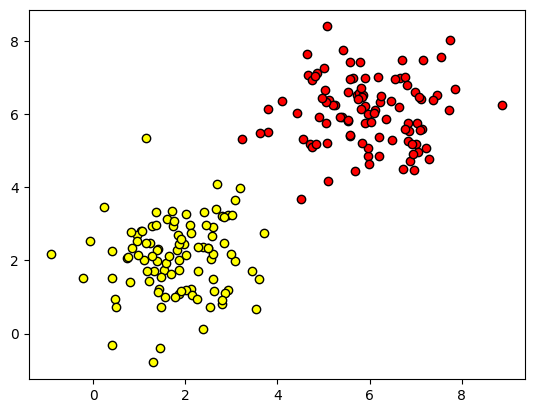

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

plt.scatter(x1, y1, c="yellow", edgecolors='black', linewidth=1)
plt.scatter(x2, y2, c="red", edgecolors='black', linewidth=1)

In [ ]:
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

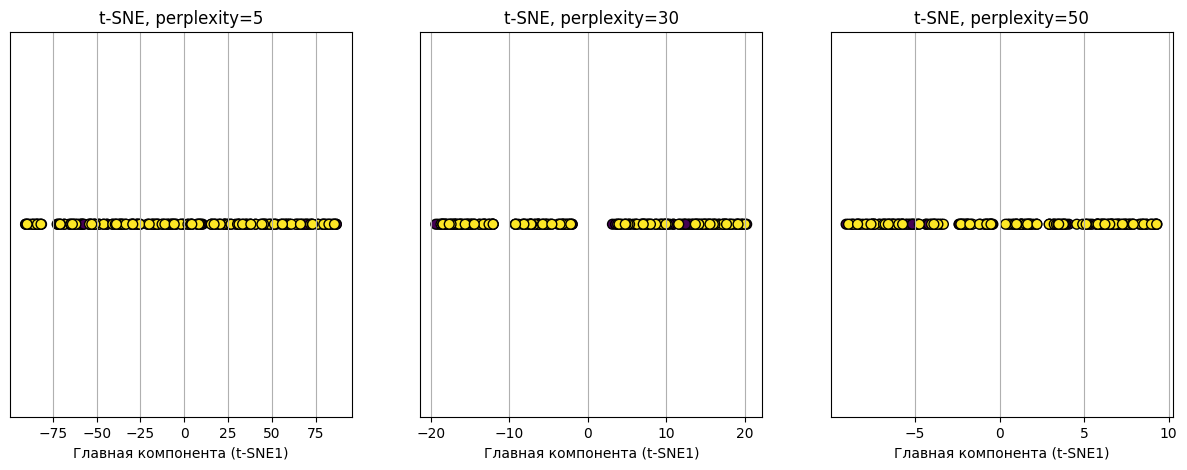

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

Kernel PCA для нелинейных данных

Из рассмотренных выше моделей только t-SNE является нелинейным. Два предыдущие методы осуществляют только линейные преобразования исходного пространства. Однако, для некоторых методов возможно применение трюка с ядерными функциями, то есть введение нелинейного преобразования.

Давайте посмотрим датасет с линейно неразделимыми классами:



In [ ]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

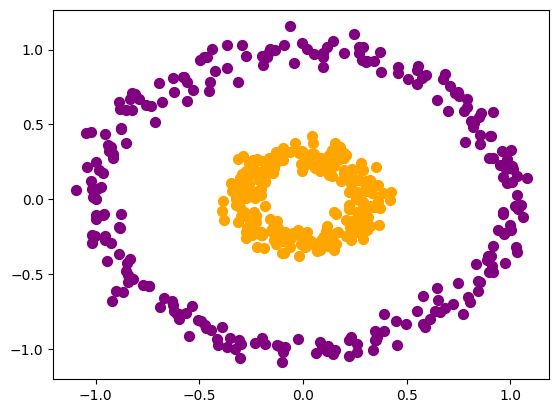

In [ ]:
X_0 = X[y == 0]
X_1 = X[y == 1]

plt.scatter(X_0[:, 0], X_0[:, 1], c='purple', label='Класс 0', marker='o', s=50)
plt.scatter(X_1[:, 0], X_1[:, 1], c='orange', label='Класс 1', marker='o', s=50)

In [ ]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
  kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
  X_kpca = kpca.fit_transform(X_scaled)

### Задания для самостоятельного выполнения

#### Задание 1
Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.

Шум: 0.2, объясненная дисперсия: 0.999


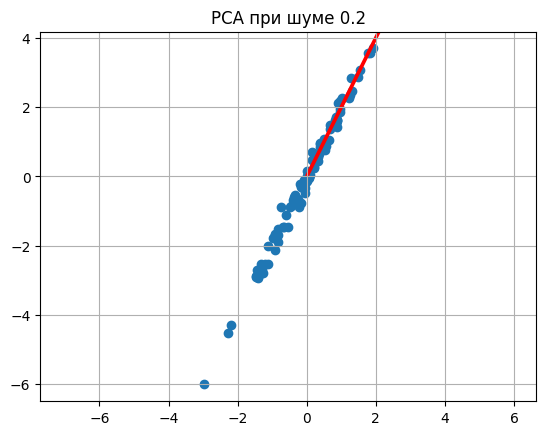

Шум: 0.8, объясненная дисперсия: 0.975


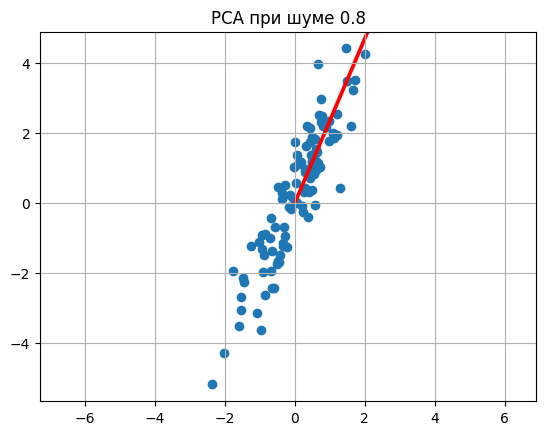

In [ ]:
def generate_data(noise_level):
    x = np.random.normal(0, 1, 100)
    y = 2 * x + np.random.normal(0, noise_level, 100)
    return np.column_stack((x, y))

for noise in [0.2, 0.8]:
    X = generate_data(noise)
    pca = PCA(n_components=1)
    pca.fit(X)
    explained = pca.explained_variance_ratio_[0]
    print(f"Шум: {noise}, объясненная дисперсия: {explained:.3f}")

    plt.scatter(X[:, 0], X[:, 1])
    plt.quiver(0, 0, *pca.components_[0], scale=1, color='r')
    plt.title(f"PCA при шуме {noise}")
    plt.axis('equal')
    plt.grid(True)
    plt.show()


#### Задание 2
Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

In [ ]:
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.5, 100)
z = -x + np.random.normal(0, 0.2, 100)
X = np.column_stack((x, y, z))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Объяснённая дисперсия:", pca.explained_variance_ratio_)
print("Суммарная:", np.sum(pca.explained_variance_ratio_))


Объяснённая дисперсия: [0.97664162 0.02037722]
Суммарная: 0.9970188303825405


#### Задание 3
Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.

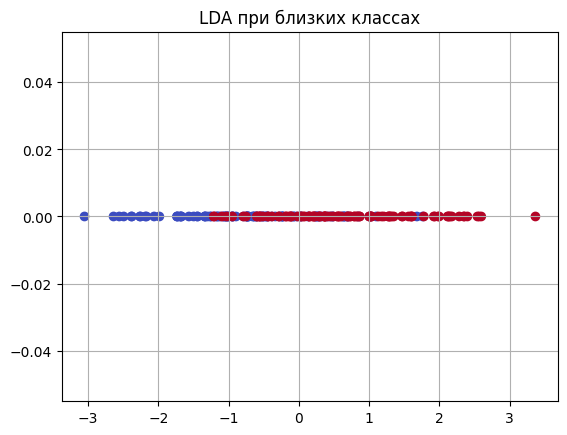

In [ ]:
x1 = np.random.normal(2, 1, 100)
y1 = np.random.normal(2, 1, 100)
x2 = np.random.normal(3, 1, 100)  # Ближе к x1
y2 = np.random.normal(3, 1, 100)

X = np.vstack([np.column_stack((x1, y1)), np.column_stack((x2, y2))])
y = np.array([0]*100 + [1]*100)

X_scaled = StandardScaler().fit_transform(X)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm')
plt.title("LDA при близких классах")
plt.grid(True)
plt.show()


LDA по-прежнему разделяет классы, но граница становится менее чёткой, увеличивается перекрытие.



#### Задание 4
Добавьте третий класс и примените LDA с n_components=2.

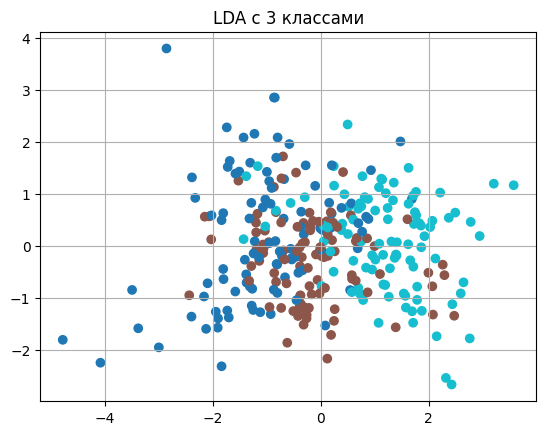

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=5, n_informative=3,
                           n_classes=3, n_redundant=0, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10')
plt.title("LDA с 3 классами")
plt.grid(True)
plt.show()


LDA теперь строит плоскость, которая оптимально разделяет 3 класса — каждый в своём кластере.

#### Задание 5
Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

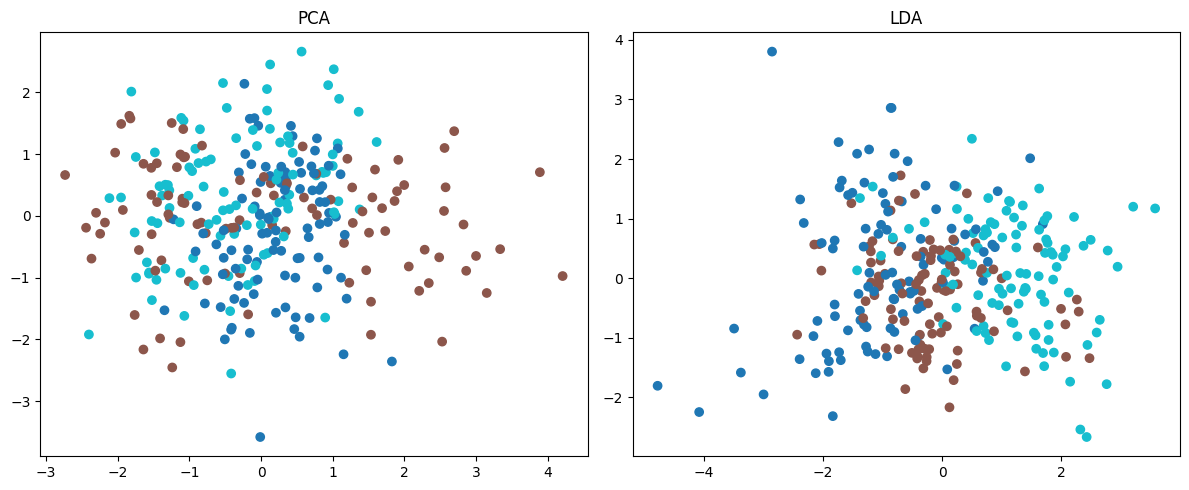

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10')
plt.title("PCA")

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10')
plt.title("LDA")

plt.tight_layout()
plt.show()


LDA — лучшая визуализация для классификации.



#### Задание 6
Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.

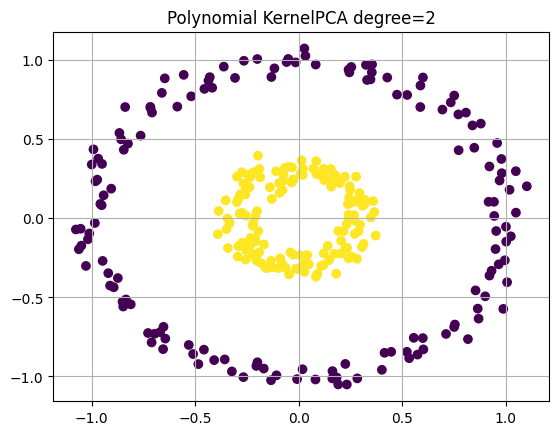

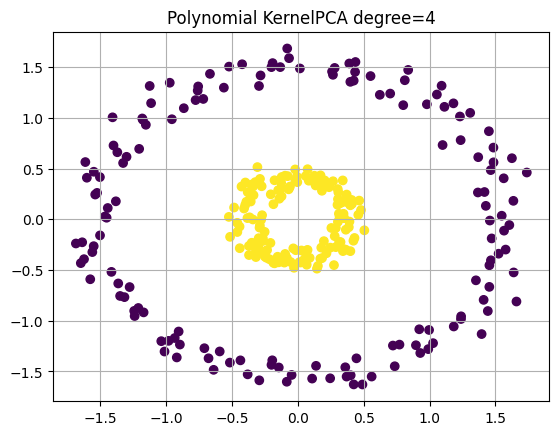

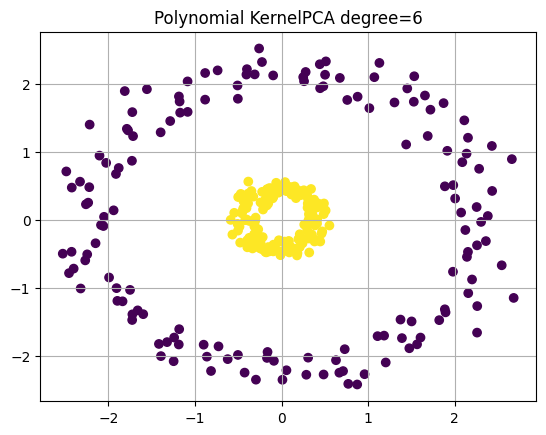

In [ ]:
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples=300, factor=0.3, noise=0.05)

for d in [2, 4, 6]:
    kpca = KernelPCA(kernel='poly', degree=d, n_components=2)
    X_kpca = kpca.fit_transform(X)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
    plt.title(f'Polynomial KernelPCA degree={d}')
    plt.grid(True)
    plt.show()


Более высокие степени увеличивают кривизну отображения. Структура меняется.



#### Задание 7
Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.

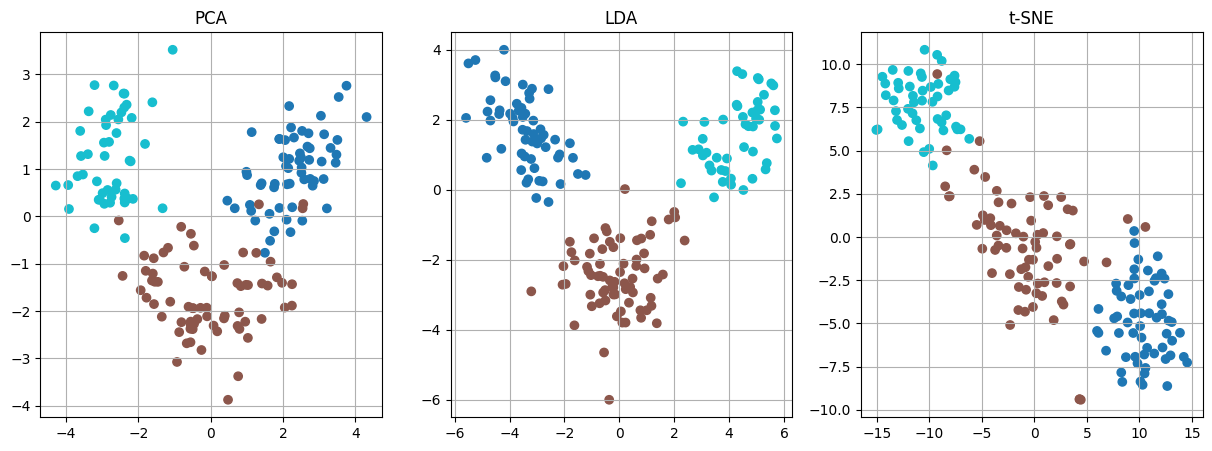

In [ ]:
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

X, y = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

# PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# LDA
X_lda = LDA(n_components=2).fit_transform(X_scaled, y)

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, X_proj, title in zip(axes, [X_pca, X_lda, X_tsne], ['PCA', 'LDA', 't-SNE']):
    ax.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='tab10')
    ax.set_title(title)
    ax.grid(True)
plt.show()


#### Задание 8
Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.

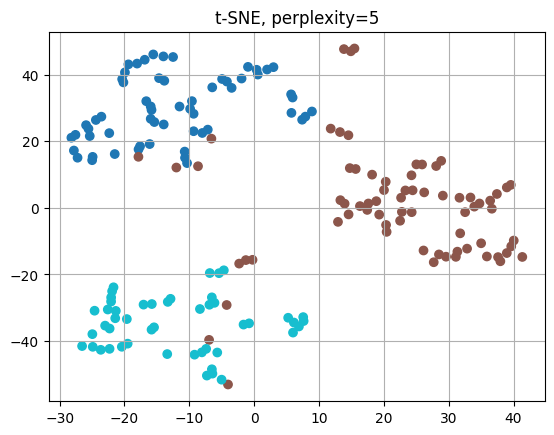

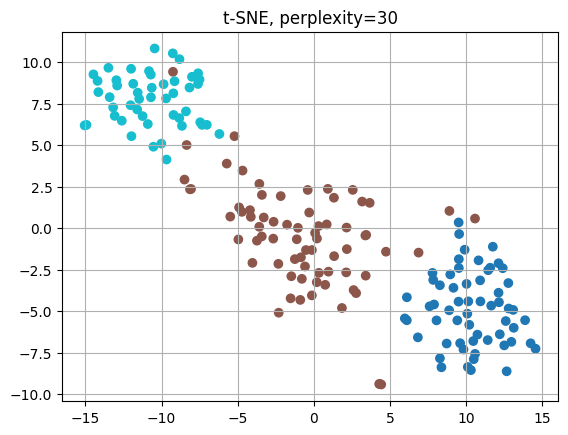

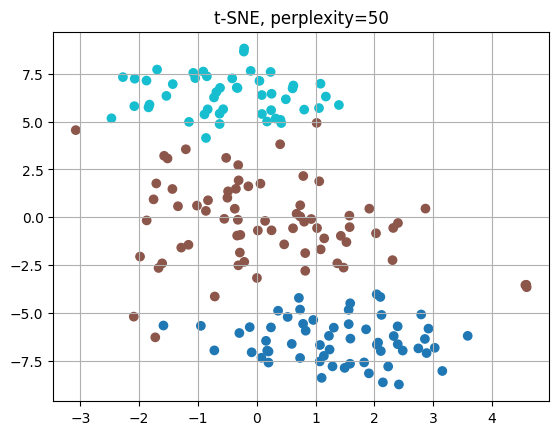

In [ ]:
for p in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
    plt.title(f't-SNE, perplexity={p}')
    plt.grid(True)
    plt.show()


#### Задание 9
Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.

In [ ]:
for n in [2, 5, 10]:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    print(f"PCA ({n}):", round(np.sum(pca.explained_variance_ratio_), 3))

    lda = LDA(n_components=min(n, len(np.unique(y)) - 1))
    lda.fit(X_scaled, y)
    print(f"LDA ({n}):", lda.explained_variance_ratio_.sum())


PCA (2): 0.554
LDA (2): 1.0
PCA (5): 0.802
LDA (5): 1.0
PCA (10): 0.962
LDA (10): 1.0


#### Задание 10
Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

pca = PCA(n_components=5).fit(X_train)
print("Train:", np.sum(pca.explained_variance_ratio_))
X_test_pca = pca.transform(X_test)
expl_test = np.var(X_test_pca, axis=0) / np.sum(np.var(X_test, axis=0))
print("Test:", np.sum(expl_test))


Train: 0.8135163882518593
Test: 0.766160919046153
